## Import Modules

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Data Resampling
from sklearn.model_selection import train_test_split

# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression

# 2. K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

# 3. Decision Tree
from sklearn.tree import DecisionTreeClassifier

# 4. Random Forest
from sklearn.ensemble import RandomForestClassifier

# 5. Support Vector Machine (SVM)
from sklearn.svm import SVC

# 6. Naive Bayes
from sklearn.naive_bayes import GaussianNB

# 7. XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from scipy.stats import uniform, randint
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Performance Measures
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

## Load Data

In [81]:
file_name = os.path.join("assets", "data.csv")
df_original = pd.read_csv(file_name)

In [82]:
df_original

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.948840,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.467030,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.366000,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.579000,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.540000,41.088000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,S549,Cohort2,BPTB,68,M,3,IV,NaN,NaN,0.52026,7.058209,156.241000,525.178000,NaN
586,S558,Cohort2,BPTB,71,F,3,IV,NaN,NaN,0.85956,8.341207,16.915000,245.947000,NaN
587,S560,Cohort2,BPTB,63,M,3,IV,NaN,NaN,1.36851,7.674707,289.701000,537.286000,NaN
588,S583,Cohort2,BPTB,75,F,3,IV,NaN,NaN,1.33458,8.206777,205.930000,722.523000,NaN


In [83]:
df = df_original.copy()

## Data Preprocessing

In [84]:
df.shape

(590, 14)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    object 
 1   patient_cohort           590 non-null    object 
 2   sample_origin            590 non-null    object 
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    object 
 5   diagnosis                590 non-null    int64  
 6   stage                    199 non-null    object 
 7   benign_sample_diagnosis  208 non-null    object 
 8   plasma_CA19_9            350 non-null    float64
 9   creatinine               590 non-null    float64
 10  LYVE1                    590 non-null    float64
 11  REG1B                    590 non-null    float64
 12  TFF1                     590 non-null    float64
 13  REG1A                    306 non-null    float64
dtypes: float64(6), int64(2), o

In [86]:
df.isnull().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

In [87]:
df['diagnosis'].value_counts()/len(df)

diagnosis
2    0.352542
3    0.337288
1    0.310169
Name: count, dtype: float64

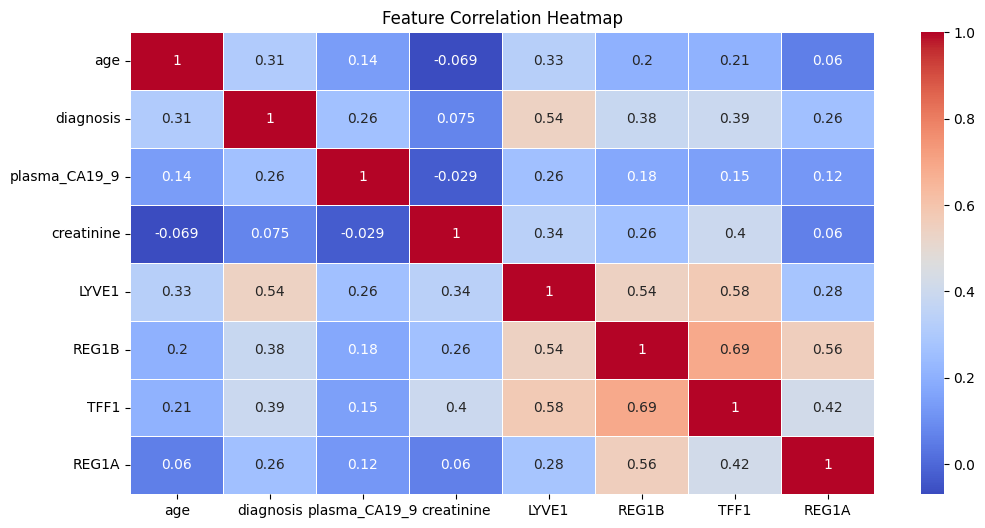

In [88]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [89]:
df.drop(columns=["sample_id", "patient_cohort", "sample_origin", "stage", "benign_sample_diagnosis", "REG1A"], inplace=True)
df.dropna(inplace=True)
df.head()

,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1
0,33,F,1,11.7,1.83222,0.893219,52.94884,654.282174
2,51,M,1,7.0,0.78039,0.145589,102.36600,461.141000
3,61,M,1,8.0,0.70122,0.002805,60.57900,142.950000
4,62,M,1,9.0,0.21489,0.000860,65.54000,41.088000
7,58,F,1,11.0,0.89349,0.003574,3.73000,40.294000


In [90]:
df['diagnosis'] = df['diagnosis'].replace({1: 0, 2: 1, 3: 1})
display(df['diagnosis'].value_counts())

diagnosis
1    258
0     92
Name: count, dtype: int64

In [91]:
df['sex'] = df['sex'].replace({"M": 0, "F": 1})
display(df['sex'].value_counts())

C:\Users\prajw\AppData\Local\Temp\ipykernel_22608\2876066962.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({"M": 0, "F": 1})


sex
1    179
0    171
Name: count, dtype: int64

In [92]:
print(f"Number of NaNs in plasma_CA19_9 column: {df['plasma_CA19_9'].isnull().sum()}")

Number of NaNs in plasma_CA19_9 column: 0


In [93]:
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

In [94]:
X

,age,sex,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1
0,33,1,11.7,1.83222,0.893219,52.948840,654.282174
2,51,0,7.0,0.78039,0.145589,102.366000,461.141000
3,61,0,8.0,0.70122,0.002805,60.579000,142.950000
4,62,0,9.0,0.21489,0.000860,65.540000,41.088000
7,58,1,11.0,0.89349,0.003574,3.730000,40.294000
...,...,...,...,...,...,...,...
569,44,1,271.7,2.42034,9.005338,144.985040,2856.123240
570,58,0,710.8,0.19227,3.055294,32.890960,196.709982
579,78,1,941.0,0.46371,1.044345,14.364360,327.397097
581,61,1,13740.0,0.32799,5.232527,123.104730,755.820867


In [95]:
y

0      0
2      0
3      0
4      0
7      0
      ..
569    1
570    1
579    1
581    1
589    1
Name: diagnosis, Length: 350, dtype: int64

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [97]:
shapes = {"X_train": X_train.shape,
          "Y_train": y_train.shape,
          "X_test": X_test.shape,
          "Y_test": y_test.shape
          }
for i in shapes:
    print(f"{i}: {shapes[i]}")

X_train: (280, 7)
Y_train: (280,)
X_test: (70, 7)
Y_test: (70,)


In [98]:
numeric_cols_to_scale = ["creatinine", "age", "LYVE1", "REG1B", "TFF1"]
scaler = StandardScaler()
X_train[numeric_cols_to_scale] = scaler.fit_transform(X_train[numeric_cols_to_scale])
X_test[numeric_cols_to_scale] = scaler.transform(X_test[numeric_cols_to_scale])

print("Scaled Training Data (first 5 rows):")
display(X_train.head())

print("\nScaled Test Data (first 5 rows):")
display(X_test.head())

Scaled Training Data (first 5 rows):


,age,sex,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1
418,0.351879,1,1972.0,0.009120,-0.466518,-0.519668,-0.202699
589,1.119215,0,1488.0,1.010235,1.441636,1.522649,1.106172
526,1.195948,1,2454.0,-0.109656,3.025503,0.088587,1.150863
426,0.198411,1,1098.0,0.518162,1.547163,0.004841,1.535156
503,0.735547,1,556.0,0.127897,1.243178,-0.193044,0.613704



Scaled Test Data (first 5 rows):


,age,sex,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1
435,0.121678,1,476.000000,0.450290,0.991584,-0.130946,-0.273596
518,-0.261991,0,1.000000,3.572411,0.396907,-0.104382,0.259816
425,1.042481,0,538.000000,-0.092688,-0.143076,-0.511681,-0.474765
82,0.889014,1,0.730948,-0.737474,-0.860586,-0.564123,-0.555091
505,-0.108523,0,1075.000000,-0.432049,-0.260668,0.623165,-0.280267


## Defining Evaluation Function

Accuracy: Number of all correct predictions/ Total number of samples in the test dataset; Acc = TP+TN/(TP+TN+FP+FN)

Sensitivity/Recall: Number of all correct positive predictions/ Total number of positive samples in the test dataset; Sn= TP/(TP+FN)

Specificity: Number of all correct negative predictions/ Total number of negative samples in the test dataset; Sp= TN/(TN+FP)

In [99]:
def evaluate_classification_model(y_target, y_predicted):

  # Generate the confusion matrix
  cm = confusion_matrix(y_target, y_predicted)

  # Print the confusion matrix
  print("Confusion Matrix:")
  print(cm)

  # Visualize the confusion matrix
  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title('Confusion Matrix')
  plt.show()

  # For multi-class classification, calculate overall accuracy and print classification report
  accuracy = accuracy_score(y_target, y_predicted)
  print(f"\nOverall Accuracy: {accuracy*100:.2f}%")

  print("\nClassification Report:")
  print(classification_report(y_target, y_predicted))

  tn, fp, fn, tp = cm.ravel()

  # Accuracy
  accuracy = (tp + tn) / (tp + tn + fp + fn)

  # Sensitivity (True Positive Rate)
  sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0

  # Specificity (True Negative Rate)
  specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

  print(f"\nAccuracy: {accuracy*100:.2f}%")
  print(f"Sensitivity: {sensitivity*100:.2f}%")
  print(f"Specificity: {specificity*100:.2f}%")

## Logistic Regression

Confusion Matrix:
[[13  5]
 [ 2 50]]


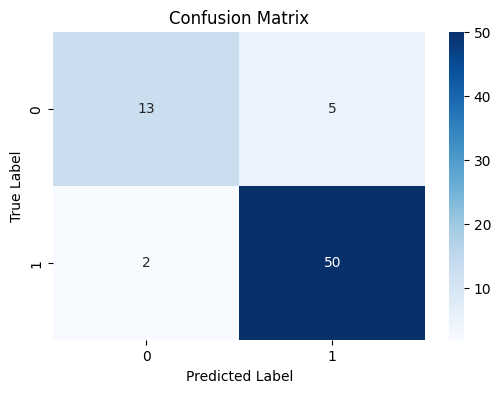


Overall Accuracy: 90.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.72      0.79        18
           1       0.91      0.96      0.93        52

    accuracy                           0.90        70
   macro avg       0.89      0.84      0.86        70
weighted avg       0.90      0.90      0.90        70


Accuracy: 90.00%
Sensitivity: 96.15%
Specificity: 72.22%


In [100]:
lr_model = LogisticRegression(random_state=42, solver='liblinear') # Added solver for potential convergence issues
lr_model.fit(X_train, y_train)
y_test_pred_lr = lr_model.predict(X_test)
evaluate_classification_model(y_test, y_test_pred_lr)

## K-Nearest Neighbors Classification

Confusion Matrix:
[[10  8]
 [ 3 49]]


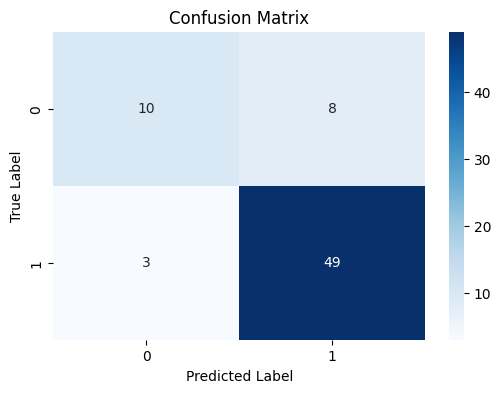


Overall Accuracy: 84.29%

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.56      0.65        18
           1       0.86      0.94      0.90        52

    accuracy                           0.84        70
   macro avg       0.81      0.75      0.77        70
weighted avg       0.84      0.84      0.83        70


Accuracy: 84.29%
Sensitivity: 94.23%
Specificity: 55.56%


In [101]:
kn_model = KNeighborsClassifier()
kn_model.fit(X_train, y_train)
y_test_pred_kn = kn_model.predict(X_test)
evaluate_classification_model(y_test, y_test_pred_kn)

## Decision Tree

Confusion Matrix:
[[ 8 10]
 [ 5 47]]


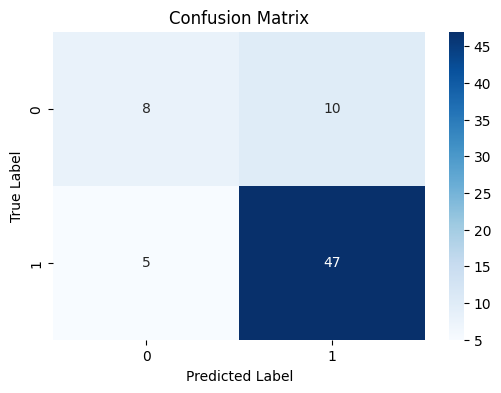


Overall Accuracy: 78.57%

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.44      0.52        18
           1       0.82      0.90      0.86        52

    accuracy                           0.79        70
   macro avg       0.72      0.67      0.69        70
weighted avg       0.77      0.79      0.77        70


Accuracy: 78.57%
Sensitivity: 90.38%
Specificity: 44.44%


In [102]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_test_pred_dt = dt_model.predict(X_test)
evaluate_classification_model(y_test, y_test_pred_dt)

## Random Forest

Confusion Matrix:
[[ 9  9]
 [ 0 52]]


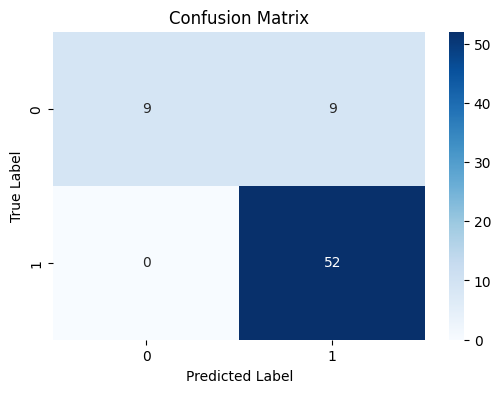


Overall Accuracy: 87.14%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        18
           1       0.85      1.00      0.92        52

    accuracy                           0.87        70
   macro avg       0.93      0.75      0.79        70
weighted avg       0.89      0.87      0.86        70


Accuracy: 87.14%
Sensitivity: 100.00%
Specificity: 50.00%


In [103]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_test_pred_rf = rf_model.predict(X_test)
evaluate_classification_model(y_test, y_test_pred_rf)

## Suport Vector Machine

Confusion Matrix:
[[ 0 18]
 [ 0 52]]


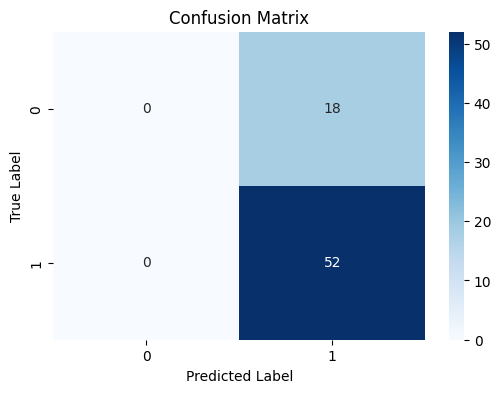


Overall Accuracy: 74.29%

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.74      1.00      0.85        52

    accuracy                           0.74        70
   macro avg       0.37      0.50      0.43        70
weighted avg       0.55      0.74      0.63        70


Accuracy: 74.29%
Sensitivity: 100.00%
Specificity: 0.00%


c:\Users\prajw\OneDrive\Documents\VS Code\Pancreatic Cancer Detection\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\prajw\OneDrive\Documents\VS Code\Pancreatic Cancer Detection\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\prajw\OneDrive\Documents\VS Code\Pancreatic Cancer Detection\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zer

In [104]:
SVC_model = SVC(kernel='rbf', random_state=42)
SVC_model.fit(X_train, y_train)
y_test_pred_SVC = SVC_model.predict(X_test)
evaluate_classification_model(y_test, y_test_pred_SVC)

## Naive Bayes

Confusion Matrix:
[[16  2]
 [11 41]]


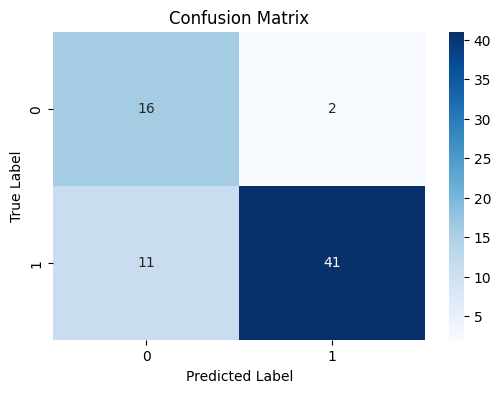


Overall Accuracy: 81.43%

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.89      0.71        18
           1       0.95      0.79      0.86        52

    accuracy                           0.81        70
   macro avg       0.77      0.84      0.79        70
weighted avg       0.86      0.81      0.82        70


Accuracy: 81.43%
Sensitivity: 78.85%
Specificity: 88.89%


In [105]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_test_pred_nb = nb_model.predict(X_test)
evaluate_classification_model(y_test, y_test_pred_nb)

## XGBoost

c:\Users\prajw\OneDrive\Documents\VS Code\Pancreatic Cancer Detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:22:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Evaluation on Test Data (XGBoost):
Confusion Matrix:
[[10  8]
 [ 1 51]]


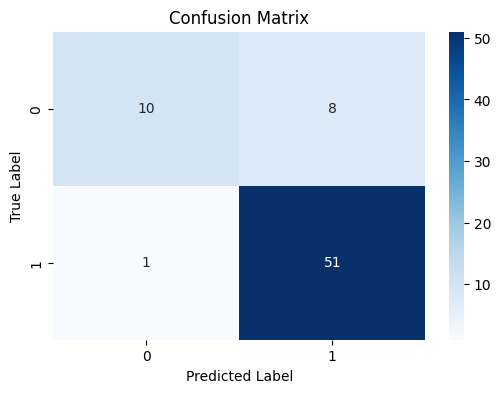


Overall Accuracy: 87.14%

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.56      0.69        18
           1       0.86      0.98      0.92        52

    accuracy                           0.87        70
   macro avg       0.89      0.77      0.80        70
weighted avg       0.88      0.87      0.86        70


Accuracy: 87.14%
Sensitivity: 98.08%
Specificity: 55.56%


In [106]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_test_pred_xgb = xgb_model.predict(X_test)
print("Evaluation on Test Data (XGBoost):")
evaluate_classification_model(y_test, y_test_pred_xgb)

## XGBoost (Tuned Hyperparameters and with RandomizedSearchCV)


--- Starting RandomizedSearchCV for XGBoost on Training Data ---
Fitting RandomizedSearchCV for XGBoost on X_train, y_train...
Fitting 10 folds for each of 500 candidates, totalling 5000 fits
RandomizedSearchCV finished.

Best parameters found by RandomizedSearchCV: {'colsample_bytree': np.float64(0.9683489602127253), 'gamma': np.float64(0.30538979927431875), 'learning_rate': np.float64(0.05637552962944075), 'max_depth': 3, 'n_estimators': 107, 'reg_alpha': np.float64(7.482596903836583), 'reg_lambda': np.float64(18.552101935637733), 'subsample': np.float64(0.6837397293346841)}

Best cross-validation accuracy: 0.8750

--- Evaluating Best XGBoost Model (from RandomizedSearchCV) on Independent Test Set ---
Confusion Matrix:
[[ 9  9]
 [ 0 52]]


c:\Users\prajw\OneDrive\Documents\VS Code\Pancreatic Cancer Detection\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:22:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


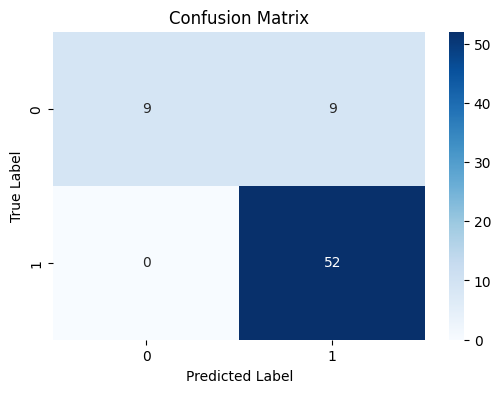


Overall Accuracy: 87.14%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        18
           1       0.85      1.00      0.92        52

    accuracy                           0.87        70
   macro avg       0.93      0.75      0.79        70
weighted avg       0.89      0.87      0.86        70


Accuracy: 87.14%
Sensitivity: 100.00%
Specificity: 50.00%


In [107]:
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

print("\n--- Starting RandomizedSearchCV for XGBoost on Training Data ---")

param_dist_xgb = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.001, 0.2),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 5),
    'reg_alpha': uniform(0, 10),
    'reg_lambda': uniform(0.1, 100)
}

xgb_base_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

scorers = {
    'accuracy_score': make_scorer(accuracy_score),
    'recall_score': make_scorer(recall_score),
    'precision_score': make_scorer(precision_score),
    'f1_score': make_scorer(f1_score),
    'roc_auc_score': make_scorer(roc_auc_score)
}

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_base_model, 
    param_distributions=param_dist_xgb,
    n_iter=500,
    scoring=scorers,
    refit='accuracy_score',
    cv=kf,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

print("Fitting RandomizedSearchCV for XGBoost on X_train, y_train...")
random_search_xgb.fit(X_train, y_train)
print("RandomizedSearchCV finished.")

best_params_xgb = random_search_xgb.best_params_
best_xgb_model = random_search_xgb.best_estimator_

print(f"\nBest parameters found by RandomizedSearchCV: {best_params_xgb}")
print(f"\nBest cross-validation accuracy: {random_search_xgb.best_score_:.4f}")

print("\n--- Evaluating Best XGBoost Model (from RandomizedSearchCV) on Independent Test Set ---")
y_test_pred_best_xgb = best_xgb_model.predict(X_test)

evaluate_classification_model(y_test, y_test_pred_best_xgb)